# Classifying Movie Reviews

* Binary classification on IMDB Dataset

* Inputs : 50,000 Reviews

* Output : Negative or Positive

# Final Result Would be :

* 0 Respresnt Negative 
* 1 Represent Positive


In [102]:
from keras.datasets import imdb

In [103]:
((xT,yT),(xt,yt)) =  imdb.load_data(num_words=10000)

In [104]:
len(xT)


25000

In [105]:
len(xt)

25000

In [106]:
# Words and their index at which they are saved
words_idx = imdb.get_word_index()


In [107]:
# eg - dict_items([('fawn', 34701), ('tsukino', 52006), ('nunnery', 52007),........

#print(words_idx.items())

In [108]:
# mapping each index to its corresponding word in dictionary 
idx_words = dict([value,key] for (key,value) in words_idx.items())

In [109]:
#eg - {34701: 'fawn', 52006: 'tsukino', 52007: 'nunnery', 16816: 'sonja',........
#print(idx_words)

In [110]:
# Taking out the acrtual review with help dict from xTrain data !
actual_review = " ".join([idx_words.get(idx-3,'#') for idx in xT[0]])

In [111]:
# how data at 0th index of XTrain looks like 
print(actual_review)

# this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert # is an amazing actor and now the same being director # father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for # and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also # to the two little boy's that played the # of norman and paul they were just brilliant children are often left out of the # list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

# For Feeding Data into neural Network we need to vectorize the Data

In [112]:
# Vector size - 10,000 (We will make sure every sentence is represnted by a vector of length 10k [00111001101011...])

In [113]:
import numpy as np

def vectorize_sentences(sentences , dim = 10000):

    outputs = np.zeros((len(sentences),dim))  
    for i,idx in enumerate(sentences): # enumerate returns index of data and indexes where data is present like 0 [2 5 6 4 ...]
        outputs[i,idx] = 1             # 1 [88 5 8 8 4 12 222 ....upto 10k]
    return outputs

In [114]:
xtrain = vectorize_sentences(xT)
xtest = vectorize_sentences(xt)

In [115]:
print(xtrain.shape)
print(xtest.shape)

print("This is how xtrain looks like :",xtrain[0])


(25000, 10000)
(25000, 10000)
This is how xtrain looks like : [0. 1. 1. ... 0. 0. 0.]


In [116]:
ytrain = np.array(yT).astype('float32')
ytest = np.array(yt).astype('float32')

# Model Architecture 

*  Use Fully connected/Dense Layers with RelU Activation
*  2 Hidden Layers with 16 units each
*  1 Output layer with 1 unit (Sigmoid Activation)

In [117]:
from keras import models
from keras.layers import Dense

In [118]:
# Define our model
model = models.Sequential()
model.add(Dense(16,activation='relu',input_shape=(10000,)))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation = 'sigmoid'))




In [119]:
#compile the model 
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])


In [120]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_14 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


# Training and Validation

In [121]:
x_val = xtrain[:5000]
xtrain_new = xtrain[5000:]

y_val = ytrain[:5000]
ytrain_new = ytrain[5000:]

In [122]:
hist = model.fit(xtrain_new,ytrain_new,epochs=4,batch_size=512,validation_data=(x_val,y_val))


Train on 20000 samples, validate on 5000 samples
Epoch 1/4
20000/20000 [==============================] - 4s 208us/step - loss: 0.4773 - accuracy: 0.8119 - val_loss: 0.3584 - val_accuracy: 0.8700
Epoch 2/4
20000/20000 [==============================] - 3s 144us/step - loss: 0.2805 - accuracy: 0.9054 - val_loss: 0.2842 - val_accuracy: 0.8912
Epoch 3/4
20000/20000 [==============================] - 3s 165us/step - loss: 0.2095 - accuracy: 0.9286 - val_loss: 0.3058 - val_accuracy: 0.8790
Epoch 4/4
20000/20000 [==============================] - 3s 149us/step - loss: 0.1713 - accuracy: 0.9416 - val_loss: 0.2755 - val_accuracy: 0.8922


# Visaulise our Results

In [123]:
from matplotlib import pyplot as plt

In [124]:
hist.history # dict of validation_loss and validation_accuracy , dict of loss and accuracy  

{'val_loss': [0.3584250329494476,
  0.2841701446533203,
  0.3058056987285614,
  0.27545687584877016],
 'val_accuracy': [0.8700000047683716,
  0.8912000060081482,
  0.8790000081062317,
  0.8921999931335449],
 'loss': [0.47726550889015196,
  0.2804948156356811,
  0.20948092234134674,
  0.17126941356658937],
 'accuracy': [0.8119, 0.9054, 0.92855, 0.94155]}

In [125]:
h=hist.history

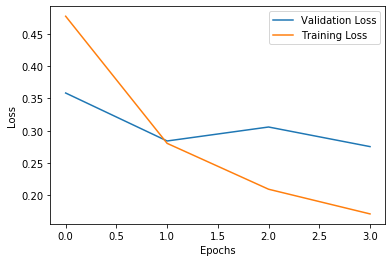

In [126]:
plt.plot(h['val_loss'],label='Validation Loss')
plt.plot(h['loss'],label = 'Training Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

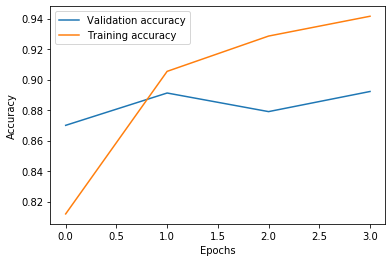

In [127]:
plt.plot(h['val_accuracy'],label='Validation accuracy')
plt.plot(h['accuracy'],label = 'Training accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()



In [128]:
#test Accuracy
model.evaluate(xtest,ytest)[1]


25000/25000 [==============================] - 4s 169us/step


0.879800021648407

In [101]:
model.evaluate(xtrain,ytrain)[1]


25000/25000 [==============================] - 3s 116us/step


0.9356799721717834

In [146]:
h = model.predict(xtest)
a = np.where(h>0.5)
h[a] = 1
b = np.where(h<0.5)
h[b]=0



In [153]:
print(h)

[[0.]
 [1.]
 [1.]
 ...
 [0.]
 [0.]
 [0.]]
